<a href="https://colab.research.google.com/github/lprockop/WorldHappinessReport/blob/main/AML_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Projects in Machine Learning
## Assignment 1

Lyle Prockop  
lp2974  
Team 7  
February 6, 2023  

[Link to GitHub repo](https://github.com/lprockop/WorldHappinessReport)

# Import data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [110]:
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

# Load data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


# EDA: Visualize bivariate relationships

In [111]:
df = pd.concat((X_train, y_train_labels), axis=1)
df.rename(columns = {0: 'Happiness'}, inplace = True)
df.head()
order = ['Very Low', 'Low', 'Average', 'High', 'Very High']
df['Happiness'] = pd.Categorical(df['Happiness'], categories=order)
df_sorted = df.sort_values(by='Happiness')

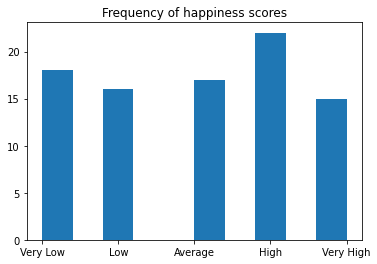

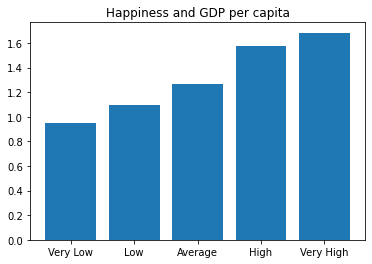

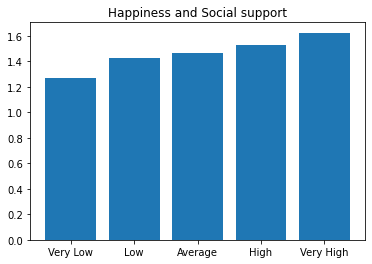

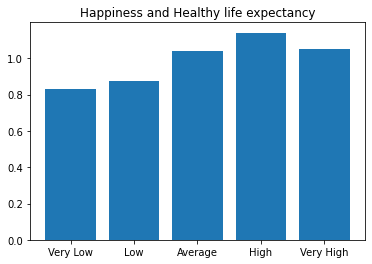

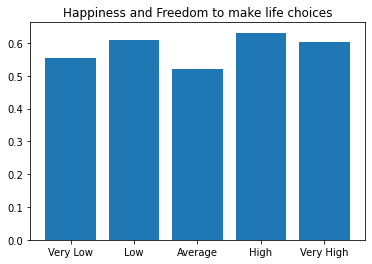

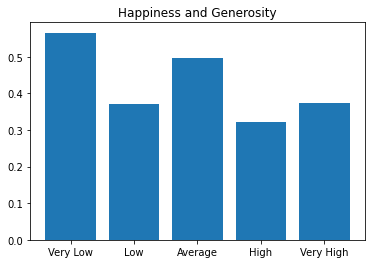

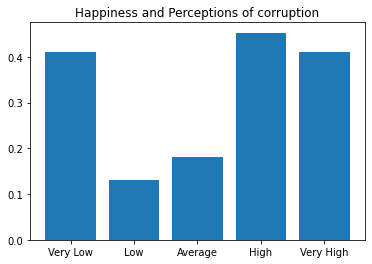

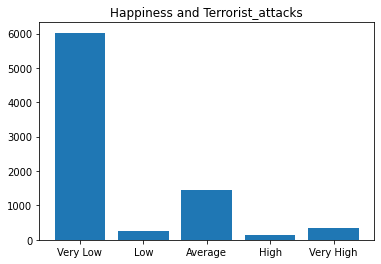

In [112]:
plt.hist(df_sorted['Happiness'])
plt.title('Frequency of happiness scores')
plt.show()

columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']
for column in columns:
  plt.bar('Happiness', column, data=df_sorted)
  plt.title("Happiness and "+str(column))
  plt.show()

These bar plots show the relationship between happiness level and GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption, and terrorist attacks.

There appear to be positive, linear relationships between happiness and both GDP per capita and social support. 

There is heterogeneity in the impact of freedom to make life choices, generosity, and perceptions of corruption. 

It seems that terrorist attacks are strongly negatively correlated with happiness at low happiness levels, but the relationship varies at higher levels of happiness.

# Data preprocessing

In [ ]:
!pip install aimodelshare --upgrade

In [113]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#preprocessing pipelines for both numeric and categorical data.

#preprocessing pipeline for numeric data
##replace missing with median; scale and center
numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#preprocessing pipeline for categorical data
##replace missing with modal; OHE
categorical_features = ['region', 'sub-region']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


# EDA: Feature importance models

Log Reg (l1 penalty) numeric feature importances coefs


,Category,Very Low,Low,Average,High,Very High
0,GDP per capita,0.000000,0.000000,-0.012776,1.673794,-1.437452
1,Social support,0.000000,1.370149,0.000000,0.530355,-0.450100
2,Healthy life expectancy,0.370060,0.647063,-0.823164,0.047148,-0.077279
3,Freedom to make life choices,-0.267233,0.665405,0.000000,0.140409,-0.196271
4,Generosity,-0.168706,-0.581029,-0.147455,0.576682,0.292792
5,Perceptions of corruption,-0.372284,-0.949374,-0.452777,0.622912,0.278840
6,Terrorist_attacks,0.000000,0.000000,-1.293123,0.000000,1.078607


<ipython-input-114-f2709d7df8cc>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(['GDP per capita', 'social support', 'life expectancy', 'freedom to choose', 'generosity', 'perceptions of corruption', 'terrorist attacks'])


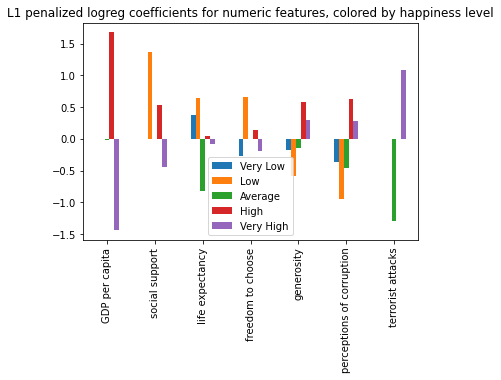



Decision Tree numeric feature importances


,Category,0
0,GDP per capita,0.308349
1,Social support,0.230062
2,Healthy life expectancy,0.227062
3,Freedom to make life choices,0.069565
4,Generosity,0.031759
5,Perceptions of corruption,0.094353
6,Terrorist_attacks,0.038851


<ipython-input-114-f2709d7df8cc>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(['GDP per capita', 'social support', 'life expectancy', 'freedom to choose', 'generosity', 'perceptions of corruption', 'terrorist attacks'])


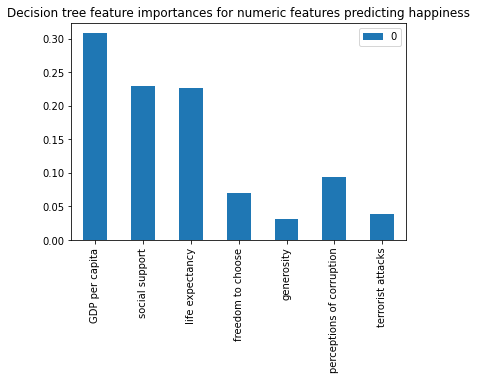

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(numeric_transformer.fit_transform(X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1)), y_train_labels)
print("Log Reg (l1 penalty) numeric feature importances coefs")
names = (pd.Series((X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1).columns), name='Category'))
coefs = (pd.DataFrame(logreg.coef_).T)
lrc = pd.concat((names, coefs), axis=1)
lrc = lrc.rename({0:'Very Low', 1:'Low', 2:'Average', 3:'High', 4: 'Very High'}, axis=1)
display(lrc)

lrc.plot(kind='bar')
plt.title('L1 penalized logreg coefficients for numeric features, colored by happiness level')
plt.axes().set_xticklabels(['GDP per capita', 'social support', 'life expectancy', 'freedom to choose', 'generosity', 'perceptions of corruption', 'terrorist attacks'])
plt.show()

print('\n')

tree = DecisionTreeClassifier()
tree.fit(numeric_transformer.fit_transform(X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1)), y_train)
print("Decision Tree numeric feature importances")
coefs = pd.DataFrame(tree.feature_importances_)
names = (pd.Series((X_train.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1).columns), name='Category'))
trc = pd.concat((names, coefs), axis=1)
display(trc)

trc.plot(kind='bar')
plt.title('Decision tree feature importances for numeric features predicting happiness')
plt.axes().set_xticklabels(['GDP per capita', 'social support', 'life expectancy', 'freedom to choose', 'generosity', 'perceptions of corruption', 'terrorist attacks'])
plt.show()

Here, models were run on only the numeric features that perform intrinsic feature selection. 

In the l1 penalized logreg, the coefficient sizes are compared. This model was chosen because coefficients are deflated and it performs intrinsic feature selection.

Decision trees also perform intrinsic feature selection. Here, the feature importance (not coefficient size) is compared directly.

The models show similar findings. GDP per capita and social support are important factors in predicting happiness, and Generosity is not an important factor. 

Finally, by way of EDA, KMeans Clustering was run (below) to find potential clusters.

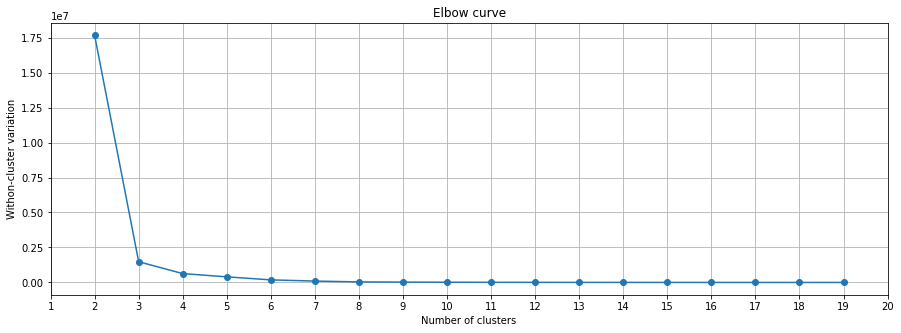

Value counts
0    73
2    10
3     4
1     1
dtype: int64


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,Average,High,Low,Very High,Very Low
cluster,,,,,,,,,,,,
3,1.131000,1.324000,0.930250,0.356000,0.246750,0.120000,523.826087,0.750000,0.00000,0.000000,0.250000,0.000000
0,0.973479,1.242014,0.783096,0.399027,0.179233,0.121068,50.924658,0.164384,0.30137,0.219178,0.191781,0.123288
1,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,6023.000000,0.000000,0.00000,0.000000,0.000000,1.000000
2,0.477100,1.033500,0.437300,0.282300,0.202500,0.079100,1427.557143,0.200000,0.00000,0.000000,0.000000,0.800000


In [115]:
from sklearn.cluster import KMeans

X_use = pd.concat((X_train.copy(), y_train), axis=1)
X_use = pd.DataFrame(X_use.drop(['region', 'sub-region', 'Country or region', 'name'], axis=1))

within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_use)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.ylabel('Withon-cluster variation')
plt.title('Elbow curve') 
plt.show()

km = KMeans(n_clusters=4, random_state=0)

X_use['cluster'] = km.fit_predict(X_use)
print("Value counts")
print(pd.Series(km.labels_).value_counts())
display(X_use.groupby('cluster').mean().sort_values('Very High', ascending=False))


K Means clustering was run on combined numeric feature and target data to identify whether there were likely to be clusters among observations that aligned with different levels of happiness. I did this because it looked like there were some features (e.g., terrorist attacks) that were  correlated with happiness only at certain levels of happiness, and I wanted to see if observations were clustered in groups that corresponded with happiness levels. Of the 4 clusters (number selected by elbow diagram), two were most strongly correlated with "very low" happiness, one was "Average" and "very high", and one was "high" and "low". This suggests that there are clusters of some of the variables but the clusters don't belong to certain happiness levels.

The two clusters correlated with very low happiness were both also correlated with low GDP per capita, low social support, low life expectancy, low freedom to make choices, (interestingly) low perceptions of corruption, and high terrorist attacks.

The cluster correlated with "average" and "very high" happiness was also correlated the most strongly with GDP per capita, social support, healthy life expectancy, and generosity.

The cluster correlated with "high" and "low" happiness was also correlated with the second-highest GDP per capita, social support, life expectancy, freedom to make choices, and the lowest terrorist attacks.

These clusters don't show consistency across happiness groups.

# Prediction models

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#train test split training data to create labeled test set for hyperparameter tuning

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train_labels, test_size=0.2, stratify=y_train_labels, random_state=0)


##### Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
gbc = GradientBoostingClassifier(random_state=0, max_depth=10)
param_grid = {'n_estimators':np.arange(1, 500, 100), 'learning_rate':(0.01, 0.1, 1)}
grid = GridSearchCV(gbc, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid.score(preprocessor(X_train_test), y_train_test))
grid.best_params_

0.6666666666666666


{'learning_rate': 1, 'n_estimators': 101}

In [122]:
model1 = GradientBoostingClassifier(random_state=0, max_depth=10, learning_rate=1, n_estimators=101).fit(preprocessor(X_train_train), y_train_train)
print(model1.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model1.score(preprocessor(X_train_test), y_train_test))

1.0
0.6666666666666666


##### Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {'n_estimators':np.arange(1,1100, 100), 'max_depth':np.arange(1,50, 5)}
grid2 = GridSearchCV(rfc, param_grid=param_grid,cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid2.score(preprocessor(X_train_test), y_train_test))
grid2.best_params_

0.6111111111111112


{'max_depth': 26, 'n_estimators': 601}

In [124]:
model2 = RandomForestClassifier(n_estimators=601, max_depth=26).fit(preprocessor(X_train_train), y_train_train)
print(model2.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model2.score(preprocessor(X_train_test), y_train_test))

1.0
0.6111111111111112


##### KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,21,2)}
grid3 = GridSearchCV(knn, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid3.score(preprocessor(X_train_test), y_train_test))
grid3.best_params_

{'n_neighbors': 13}

In [31]:
model3 = KNeighborsClassifier(n_neighbors=13).fit(preprocessor(X_train_train), y_train_train)
print(model3.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model3.score(preprocessor(X_train_test), y_train_test))

0.6857142857142857
0.5555555555555556


##### SVC

In [33]:
from sklearn.svm import SVC

svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
grid4 = GridSearchCV(svc, param_grid=param_grid, cv=10).fit(preprocessor(X_train_train), y_train_train)
print(grid4.score(preprocessor(X_train_test), y_train_test))
grid4.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
model4 = SVC(C=10, gamma=0.01, kernel='rbf').fit(preprocessor(X_train_train), y_train_train)
print(model4.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model4.score(preprocessor(X_train_test), y_train_test))

0.7857142857142857
0.5555555555555556


##### Bagging Classifier

In [43]:
from sklearn.ensemble import BaggingClassifier

model5 = BaggingClassifier().fit(preprocessor(X_train_train), y_train_train)
print(model5.score(preprocessor(X_train_train), y_train_train)) # Fit score, 0-1 scale.
print(model5.score(preprocessor(X_train_test), y_train_test))

0.9571428571428572
0.7222222222222222


## Fit and save out model (done for each of the 6 models listed above)

In [44]:
model = model5

In [45]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## Generate predictions and submit model (done for each of the 6 models listed above)

In [46]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [47]:
#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {'team':'7'})


Insert search tags to help users find your model (optional): bagging classifier
Provide any useful notes about your model (optional): bagging classifier with decision tree

Your model has been submitted as model version 501

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


# Outcomes

First, I submitted a Gradient Boosting Classifier, Random Forest Classifier, and KNN Classifier. These models didn't perform particularly well.

My team's advice was to test different models, including suggested a Bagging Classifier and SVC. They also suggested changing the hyper-parameters. 

After hyper-parameter tuning, I submitted a Bagging Classifier, SVC, and a few other Gradient Boosting Classifiers with different hyper parameters. The final models are shown below.

Overall, the best performing model was SVC with hyper parameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}.

In [71]:
results = pd.read_csv('public-leaderboard.csv')
print(results.columns)
results.head()

Index(['ACCURACY', 'F1_SCORE', 'PRECISION', 'RECALL', 'ML_FRAMEWORK',
       'TRANSFER_LEARNING', 'DEEP_LEARNING', 'MODEL_TYPE', 'DEPTH',
       'NUM_PARAMS', 'FLATTEN_LAYERS', 'BATCHNORMALIZATION_LAYERS',
       'DROPOUT_LAYERS', 'DENSE_LAYERS', 'SIGMOID_ACT', 'RELU_ACT', 'TANH_ACT',
       'SOFTMAX_ACT', 'LOSS', 'OPTIMIZER', 'MEMORY_SIZE', 'TEAM', 'USERNAME',
       'TIMESTAMP', 'VERSION'],
      dtype='object')


,ACCURACY,F1_SCORE,PRECISION,RECALL,ML_FRAMEWORK,TRANSFER_LEARNING,DEEP_LEARNING,MODEL_TYPE,DEPTH,NUM_PARAMS,...,RELU_ACT,TANH_ACT,SOFTMAX_ACT,LOSS,OPTIMIZER,MEMORY_SIZE,TEAM,USERNAME,TIMESTAMP,VERSION
0,0.529412,0.496121,0.677778,0.537857,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-03 21:06:32.633284,246
1,0.500000,0.495707,0.575983,0.524286,sklearn,False,False,SVC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-06 19:07:27.821977,499
2,0.470588,0.469382,0.632821,0.484286,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-02-02 22:21:28.005441,143
3,0.470588,0.469382,0.632821,0.484286,sklearn,False,False,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-01-31 22:43:05.553645,19
4,0.470588,0.440635,0.643939,0.495714,sklearn,False,False,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,lprockop,2023-01-31 22:42:08.360418,13


In [68]:
print("Best accuracy and f1 score for each model type:")
display(results[['ACCURACY', 'F1_SCORE']].groupby(results['MODEL_TYPE']).max())

Best accuracy and f1 score for each model type:


,ACCURACY,F1_SCORE
MODEL_TYPE,,
BaggingClassifier,0.441176,0.444567
GradientBoostingClassifier,0.529412,0.496121
RandomForestClassifier,0.470588,0.446762
SVC,0.500000,0.495707


<ipython-input-107-c77ff2b93e6e>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(results['MODEL_TYPE'], rotation=90)


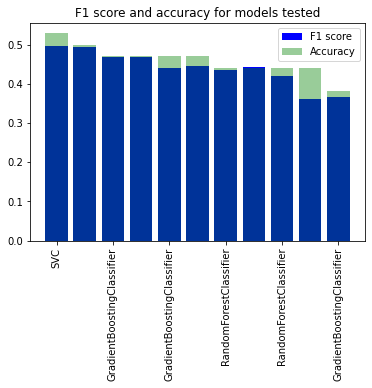

In [107]:
plt.bar(results.index, results['F1_SCORE'], alpha=1, color='blue', label='F1 score')
plt.bar(results.index, results['ACCURACY'], alpha=0.4, color='green', label='Accuracy')
plt.axes().set_xticklabels(results['MODEL_TYPE'], rotation=90)
plt.title('F1 score and accuracy for models tested')
plt.legend()
plt.show()

<ipython-input-108-47a7067f25e8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(results['MODEL_TYPE'], rotation=90)


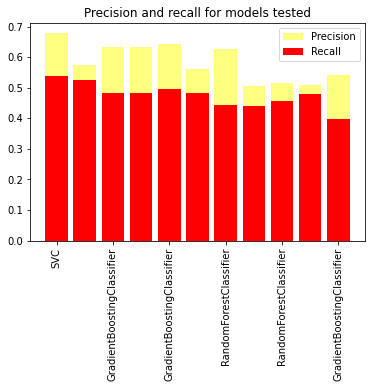

In [108]:
plt.bar(results.index, results['PRECISION'], alpha=0.5, color='yellow', label='Precision')
plt.bar(results.index, results['RECALL'], alpha=1, color='red', label='Recall')
plt.axes().set_xticklabels(results['MODEL_TYPE'], rotation=90)
plt.title('Precision and recall for models tested')
plt.legend()
plt.show()